# WRF

Results from [WRF](https://www2.mmm.ucar.edu/wrf/) Weather Research & Forecasting Model using the [WRFV3 benchmarks](https://www2.mmm.ucar.edu/wrf/WG2/benchv3/).

In [45]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, display_markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show:
- `runtime_real` (s): Wallclock time for the entire MPI job. Lower values are better performance.
- `gflops`: Gigaflops per second, calculated using WRF's internal timing information. Higher values are better performance.

### WRF_12km_run*: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,58.267,58.541
2,36.250,35.471
4,31.304,30.315
8,18.424,82.590
16,17.148,82.629
32,19.816,18.087


### WRF_12km_run*: gflops

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,100.738468,100.780792
2,209.806785,209.858477
4,390.281351,388.785974
8,759.254805,729.208732
16,1063.881433,929.652122
32,1419.716396,1151.612089


### WRF_2_5km_run*: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,2862.343,2851.405
2,1504.685,1506.094
8,477.870,706.603
16,313.148,802.775
32,229.541,1233.355


### WRF_2_5km_run*: gflops

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,108.277093,108.606037
2,214.725493,214.697360
8,832.436320,769.011059
16,1561.541929,457.541821
32,3170.396797,271.847855


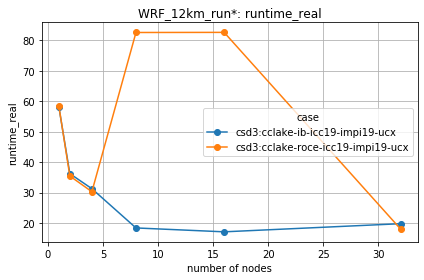

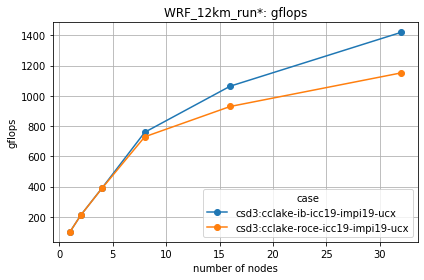

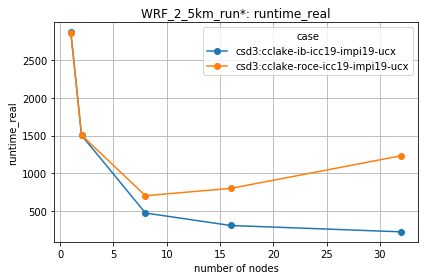

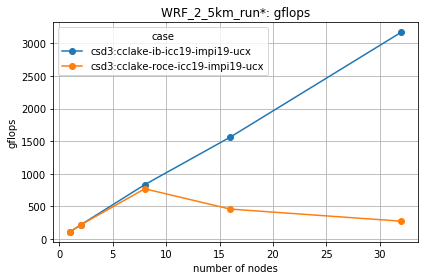

In [47]:
for test in ['WRF_12km_run*', 'WRF_2_5km_run*']:
    for var in ['runtime_real', 'gflops']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', var)
        if df is None:
            print('%s: no data found' % var)
            continue
        title = '%s: %s' % (test, var)
        display_markdown('### %s' % title, raw=True)
        display(df)
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(var)
        ax.set_title(title)
        plt.tight_layout()